In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from functions.data import preprocess, filter_df

In [2]:
save=True

# Get Data

In [3]:
df = pd.read_csv(
    "data/downloads/Physics.csv", header=None, encoding='latin1',
    names=['Institution', 'Subject', 'Degree type and admission semester',
           'Accept or reject', 'Method of communication', 'Date', 'GPA',
           'GRE Verbal', 'GRE Quantitative', 'GRE Writing', 'GRE Subject',
           'Student classification', 'Date posted', 'Comments'
    ])

df.head()

,Institution,Subject,Degree type and admission semester,Accept or reject,Method of communication,Date,GPA,GRE Verbal,GRE Quantitative,GRE Writing,GRE Subject,Student classification,Date posted,Comments
0,"EPFL, ETH, Geneve",Physics,PhD (F19),Other,Other,30 Mar 2019,NaN,NaN,NaN,NaN,NaN,A,30 Mar 2019,TTPB: The interview was with all three (Gaberd...
1,Northwestern University,Physics,PhD (F19),Accepted,E-mail,29 Mar 2019,3.77,154.0,167.0,3.0,880.0,U,29 Mar 2019,Finally
2,University Of Notre Dame,Physics,PhD (F19),Wait listed,E-mail,29 Mar 2019,NaN,NaN,NaN,NaN,NaN,A,29 Mar 2019,NaN
3,Boston University,Physics,PhD (F19),Rejected,E-mail,29 Mar 2019,NaN,NaN,NaN,NaN,NaN,I,29 Mar 2019,Finally BU result has come. Disappointed. Glad...
4,"University Of California, Riverside",Physics,PhD (F19),Rejected,E-mail,29 Mar 2019,3.63,156.0,163.0,4.0,570.0,A,29 Mar 2019,TTPB: lol I emailed the same person you did ju...


# Clean Data

In [4]:
df = df.reset_index().rename(columns={'index': 'id_'})
df = preprocess(df)
df = filter_df(df)

In [5]:
len(df)

4934

In [6]:
if save:
    df = df[(df["degree_type_and_admission_semester"].isin([
        "PhD (F19)",
        "PhD (F18)",
        "PhD (F17)",
        "PhD (F16)",
        "PhD (F15)",
        "PhD (F14)",
    ]))].to_csv("data/physics.csv", index=None)  # filter out F12 and F13

# Plot Entries by Year

In [9]:
year_list = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
count_array = (
    df[df["degree_type_and_admission_semester"].isin([
        "PhD (F19)",
        "PhD (F18)",
        "PhD (F17)",
        "PhD (F16)",
        "PhD (F15)",
        "PhD (F14)",
        "PhD (F13)",
        "PhD (F12)",
    ])]["degree_type_and_admission_semester"].value_counts().sort_index(
        ascending=True).values)

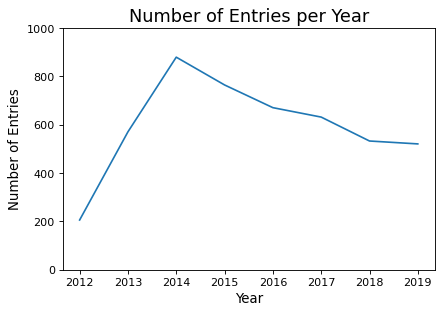

In [14]:
# Number of entries per year
plt.figure(dpi=80)
plt.plot(year_list, count_array)
plt.ylim(0, 1000)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Entries', fontsize=12)
plt.title('Number of Entries per Year', fontsize=16)
if save:
    plt.savefig('figures/eda/number-of-entries-per-year.png')